# Credit Risk Scoring (Loan Approval Prediction)
📘 Introduction & Problem Statement:
In financial institutions, lending to unqualified applicants increases the risk of default and non-performing assets (NPAs). Traditional rule-based systems can be inefficient in identifying high-risk applicants.

🎯 Business Objective:
To develop a credit risk model that predicts loan approval outcomes based on applicant profiles, improving lending decisions and minimizing risk exposure.

## 01- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 02- Load dataset

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


# 03- EDA Steps

In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.fillna(0, inplace=True)
print("NaNs has been replaced with 0")

NaNs has been replaced with 0


In [11]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [12]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [13]:
df.duplicated().sum()

np.int64(0)

# 04- Data Wrangling

In [14]:
df["combined_income"]= df['applicantincome'] + df['coapplicantincome']
df["combined_income"].head()

,combined_income
0,1950.0
1,3127.0
2,42083.0
3,4328.0
4,5970.0


In [15]:
# Calculate mean values (excluding 0s to avoid skewing)
loan_amount_mean = df[df['loanamount'] != 0]['loanamount'].mean()
loan_term_mean = df[df['loan_amount_term'] != 0]['loan_amount_term'].mean()

In [16]:
# Replace 0 values with the calculated means
df['loanamount'] = np.where(df['loanamount'] == 0, loan_amount_mean, df['loanamount'])
df['loan_amount_term'] = np.where(df['loan_amount_term'] == 0, loan_term_mean, df['loan_amount_term'])

In [17]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,combined_income
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,1950.0
1,LP002502,Female,Yes,2,Not Graduate,0,210,2917.0,98.0,360.0,1.0,Semiurban,Y,3127.0
2,LP002949,Female,No,3+,Graduate,0,416,41667.0,350.0,180.0,0.0,Urban,N,42083.0
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y,4328.0
4,LP001644,0,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,5970.0


# 05- Feature Engineering & Preprocessing

In [18]:
df['loan_id_extracted'] = df['loan_id'].str.replace('LP', '').astype(int)

In [19]:
# Creates a numeric-encoded copy of the DataFrame with extracted loan IDs for correlation analysis while preserving the original data.
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original dataframe
df_corr = df.copy()

# First ensure we've created the loan_id_extracted column if not already done
if 'loan_id_extracted' not in df_corr.columns:
    df_corr['loan_id_extracted'] = df_corr['loan_id'].str.extract('(\d+)').astype(int)

# Encode categorical variables
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'loan_id_extracted':  # Skip the original Loan_ID column
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

In [20]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale (exclude categoricals and target)
num_cols = ['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term']
scaler = StandardScaler()

# Fit on training data ONLY, then transform both train/test
df[num_cols] = scaler.fit_transform(df[num_cols])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Default is (0,1)
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,combined_income,loan_id_extracted
0,LP001722,Male,Yes,0,Graduate,No,0.000000,0.043200,0.182344,0.743590,1.0,Rural,N,1950.0,1722
1,LP002502,Female,Yes,2,Not Graduate,0,0.000742,0.070007,0.128799,0.743590,1.0,Semiurban,Y,3127.0,2502
2,LP002949,Female,No,3+,Graduate,0,0.003290,1.000000,0.493488,0.358974,0.0,Urban,N,42083.0,2949
3,LP002603,Female,No,0,Graduate,No,0.006122,0.088391,0.150507,1.000000,1.0,Rural,Y,4328.0,2603
4,LP001644,0,Yes,0,Graduate,Yes,0.006481,0.127103,0.230101,0.743590,1.0,Rural,Y,5970.0,1644


In [23]:
# One-hot encode categoricals first
cat_cols = ['gender', 'married', 'education', 'self_employed']
df = pd.get_dummies(df, columns=cat_cols)

In [24]:
# First get list of categorical columns before one-hot encoding
cat_cols = ['gender', 'married', 'education', 'self_employed', 'dependents', 'property_area']

# Create correlation dataframe BEFORE one-hot encoding
df_corr = df.copy()

# Convert categorical columns to numerical codes
for col in cat_cols:
    if col in df_corr.columns:  # Check if column exists
        df_corr[col] = pd.factorize(df_corr[col])[0]

# 06- Data Visualization

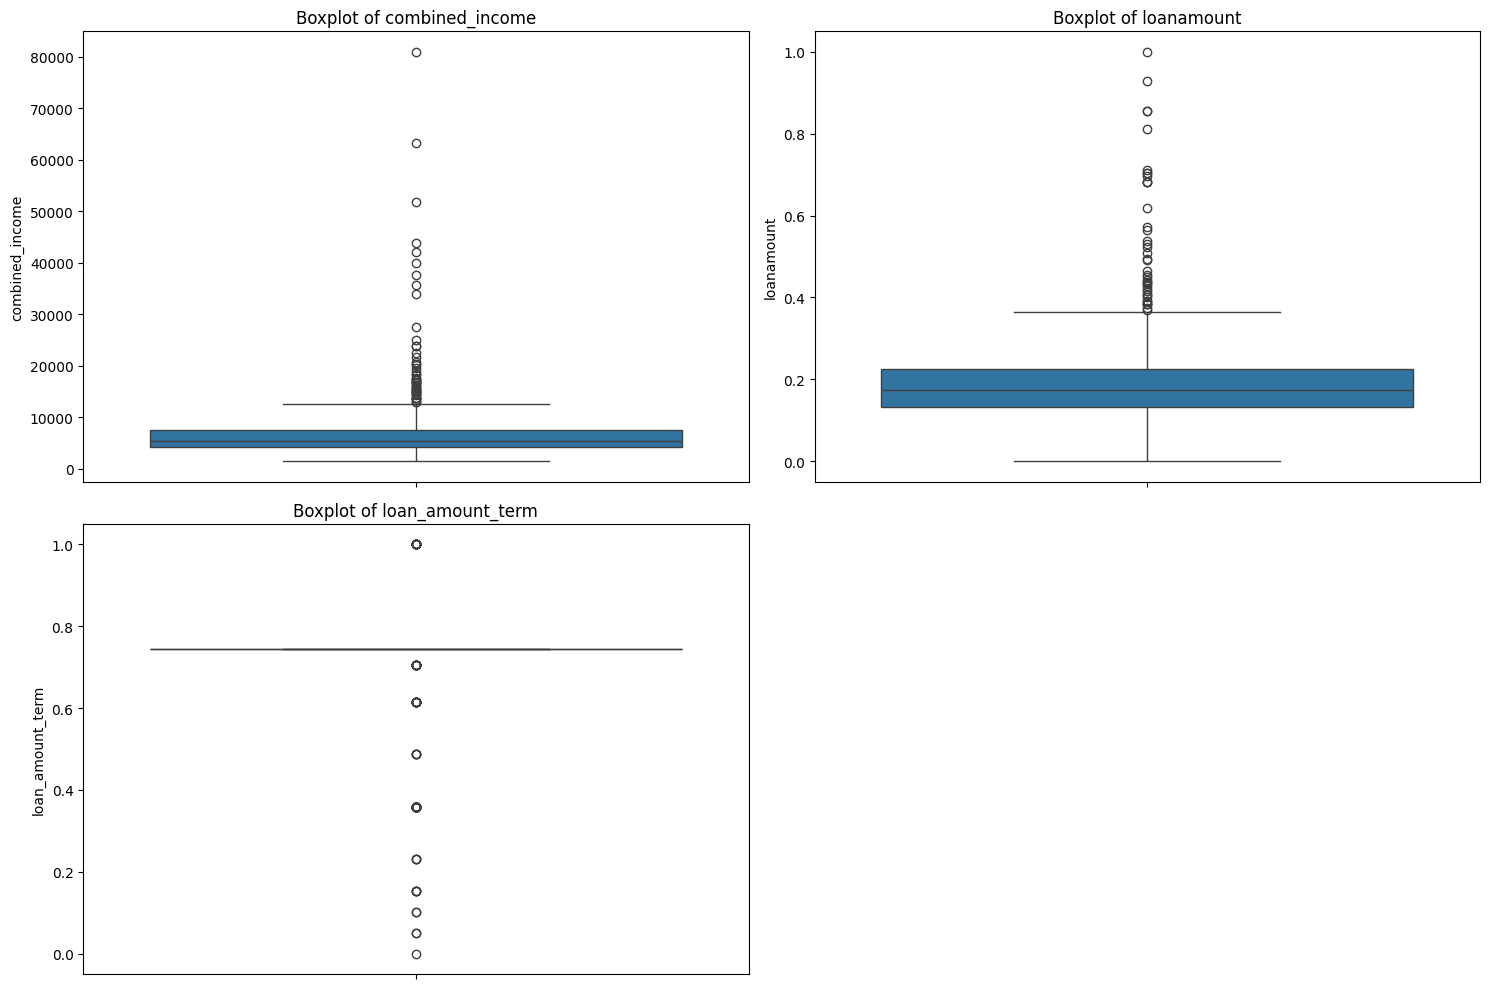

In [25]:
# Boxplots for numerical variables
num_cols = ['combined_income', 'loanamount', 'loan_amount_term']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [26]:
# Treat outliers (cap at 99th percentile)
for col in ['combined_income', 'loanamount']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col]>upper_limit, upper_limit, df[col])

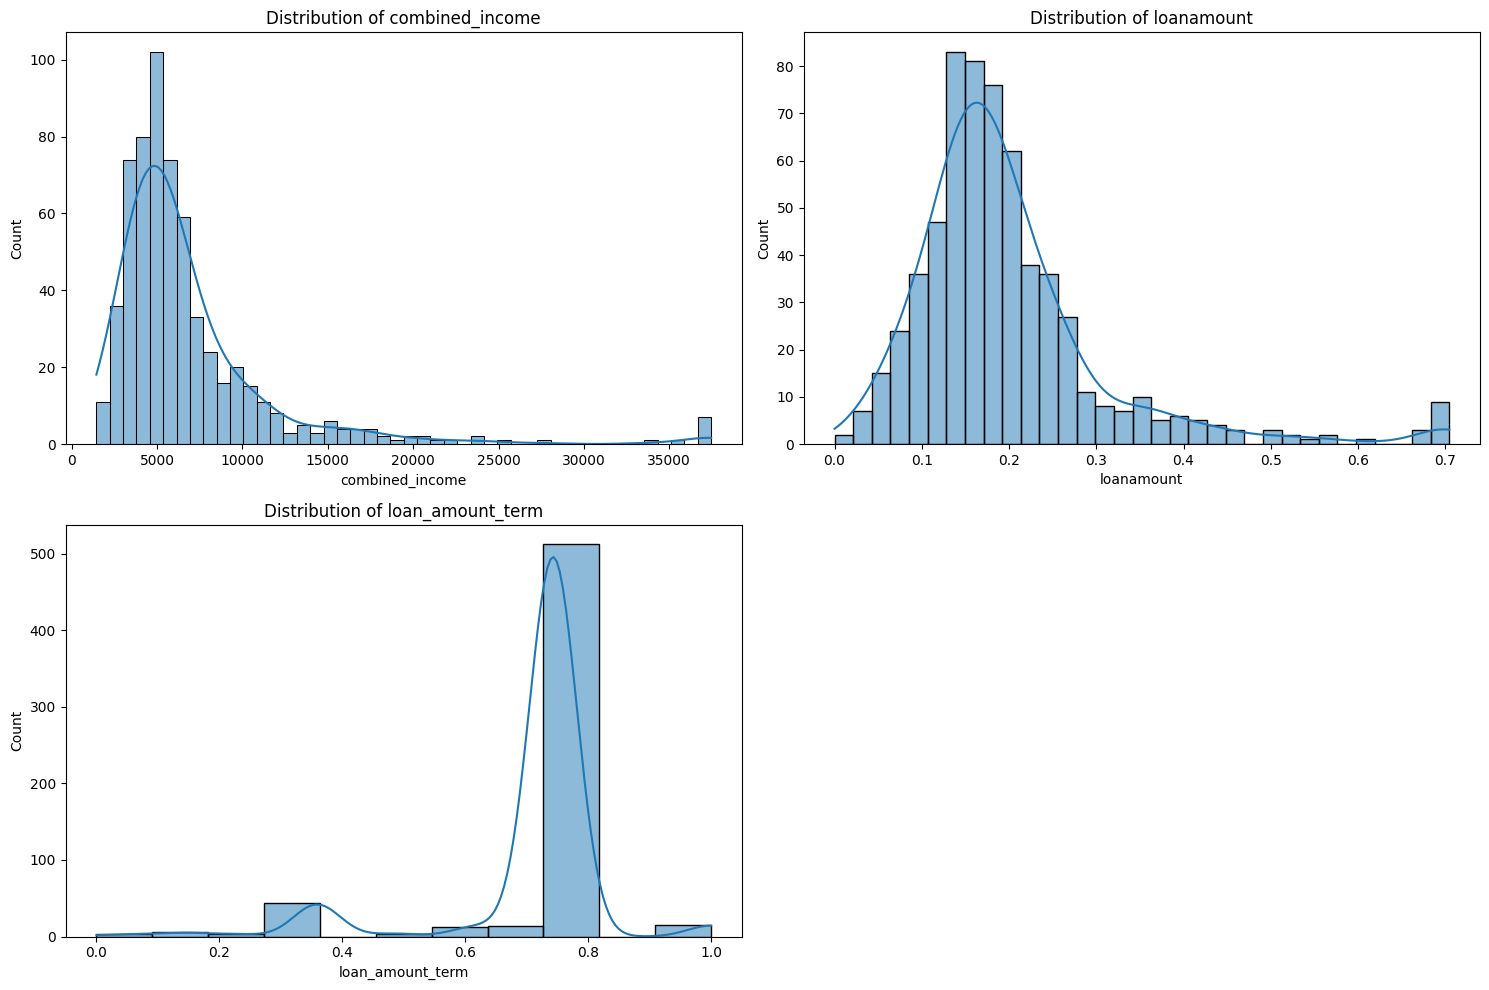

In [27]:
# Numerical variables
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

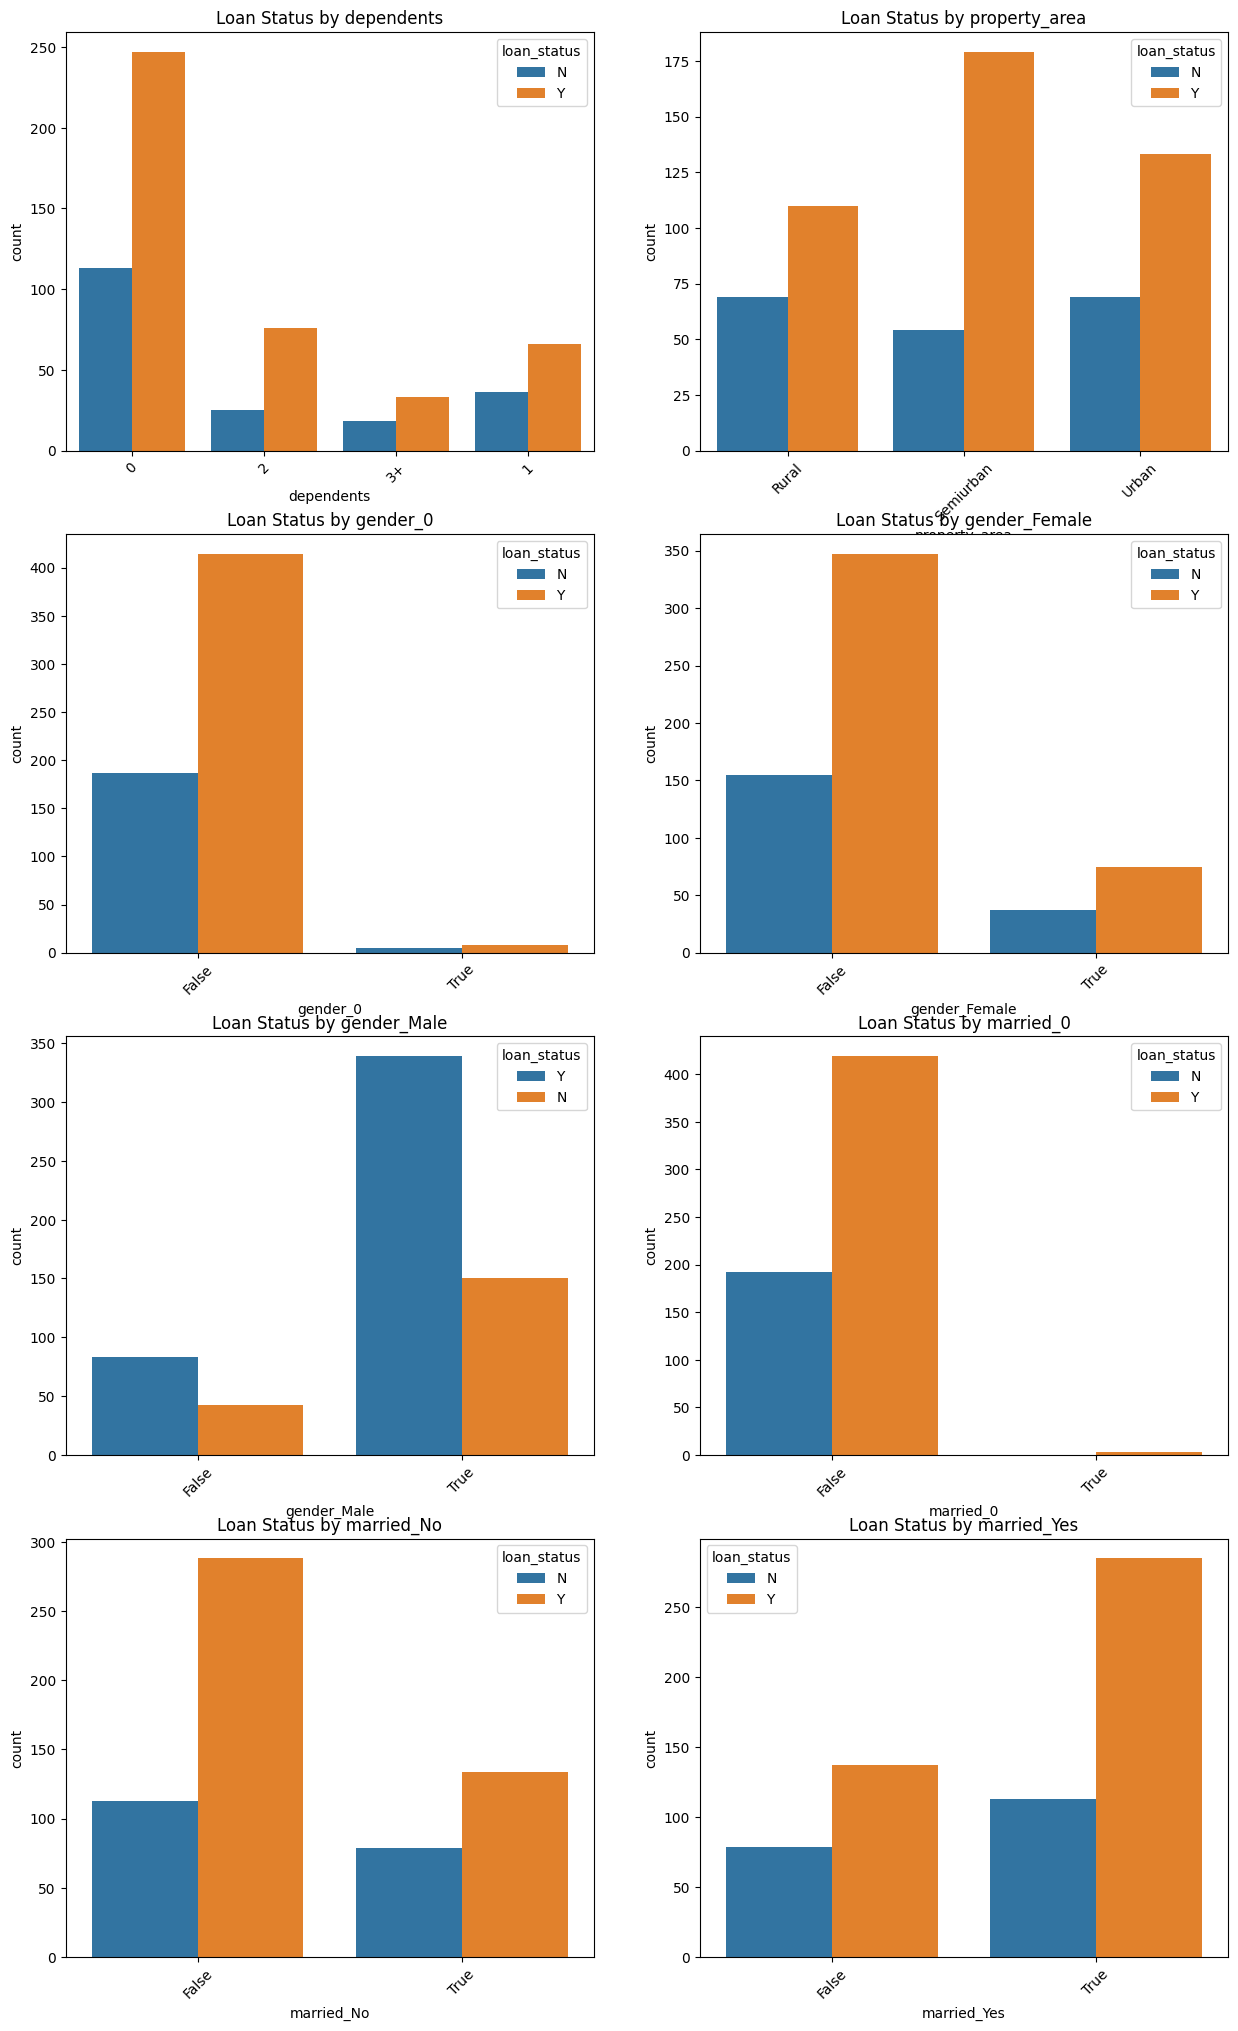

In [28]:
# Loan Status vs other variables
# First get the dummy column names that were created from the original categorical columns
dummy_cols = [col for col in df.columns if any(cat in col for cat in ['gender', 'married', 'education', 'self_employed', 'dependents', 'property_area'])]

plt.figure(figsize=(15,25))
for i, col in enumerate(dummy_cols, 1):
    plt.subplot(4,2,i)
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'Loan Status by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

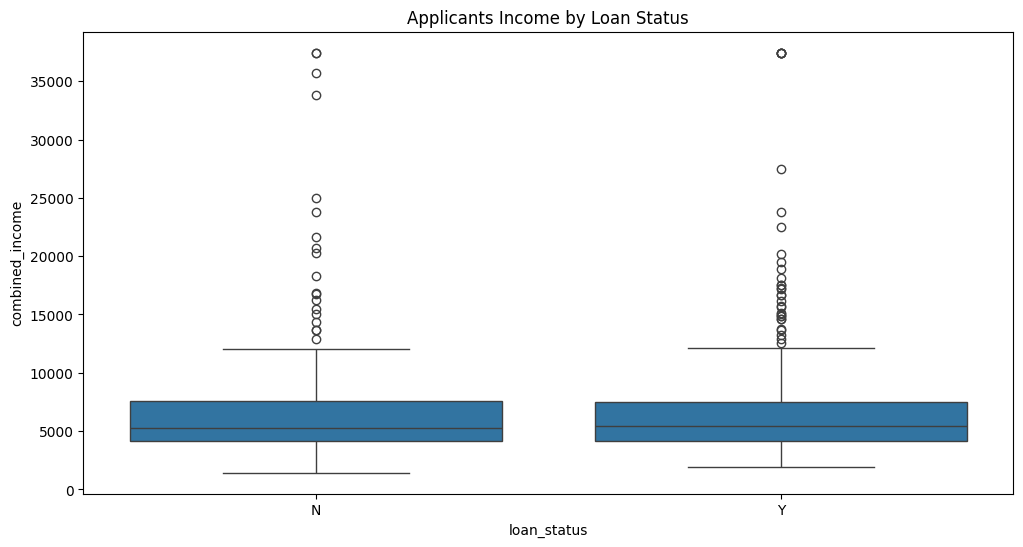

In [29]:
# Income vs Loan Status
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='loan_status', y='combined_income')
plt.title('Applicants Income by Loan Status')
plt.show()

In [30]:
import plotly.express as px

# Interactive plot using existing columns
fig = px.scatter(df, x='applicantincome', y='loanamount', color='loan_status',
                 hover_data=['property_area', 'education_Graduate', 'education_Not Graduate'],
                 title='Income vs Loan Amount by Approval Status')
fig.show()

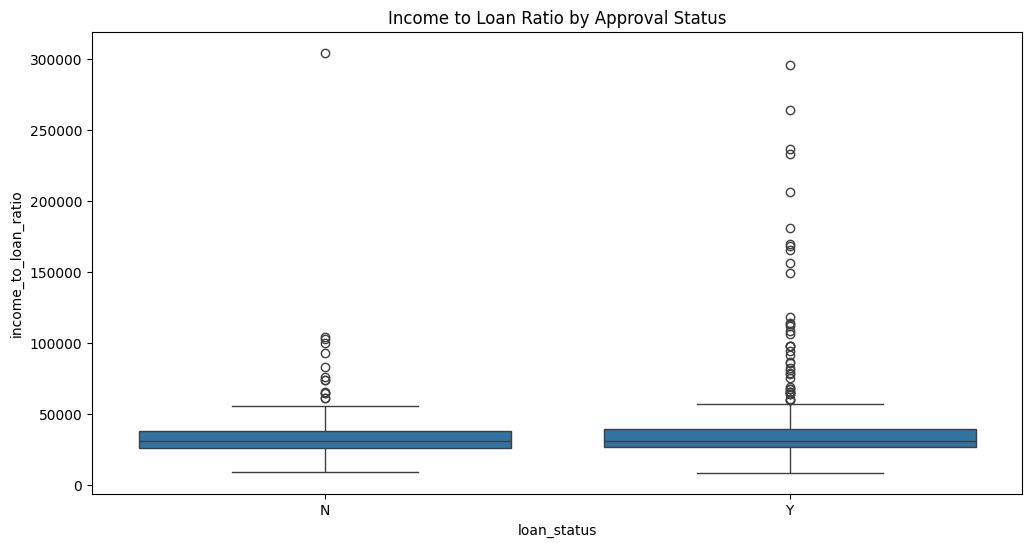

In [31]:
# Create Total Income feature
df['income_to_loan_ratio'] = df['combined_income'] / df['loanamount']

# Analyze new metrics
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='loan_status', y='income_to_loan_ratio')
plt.title('Income to Loan Ratio by Approval Status')
plt.show()

In [32]:
df.head()

,loan_id,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,combined_income,...,gender_Male,married_0,married_No,married_Yes,education_Graduate,education_Not Graduate,self_employed_0,self_employed_No,self_employed_Yes,income_to_loan_ratio
0,LP001722,0,0.000000,0.043200,0.182344,0.743590,1.0,Rural,N,1950.00,...,True,False,False,True,True,False,False,True,False,10694.047619
1,LP002502,2,0.000742,0.070007,0.128799,0.743590,1.0,Semiurban,Y,3127.00,...,False,False,False,True,False,True,True,False,False,24278.168539
2,LP002949,3+,0.003290,1.000000,0.493488,0.358974,0.0,Urban,N,37453.02,...,False,False,True,False,True,False,True,False,False,75894.536129
3,LP002603,0,0.006122,0.088391,0.150507,1.000000,1.0,Rural,Y,4328.00,...,False,False,True,False,True,False,False,True,False,28756.230769
4,LP001644,0,0.006481,0.127103,0.230101,0.743590,1.0,Rural,Y,5970.00,...,False,False,False,True,True,False,False,False,True,25945.094340


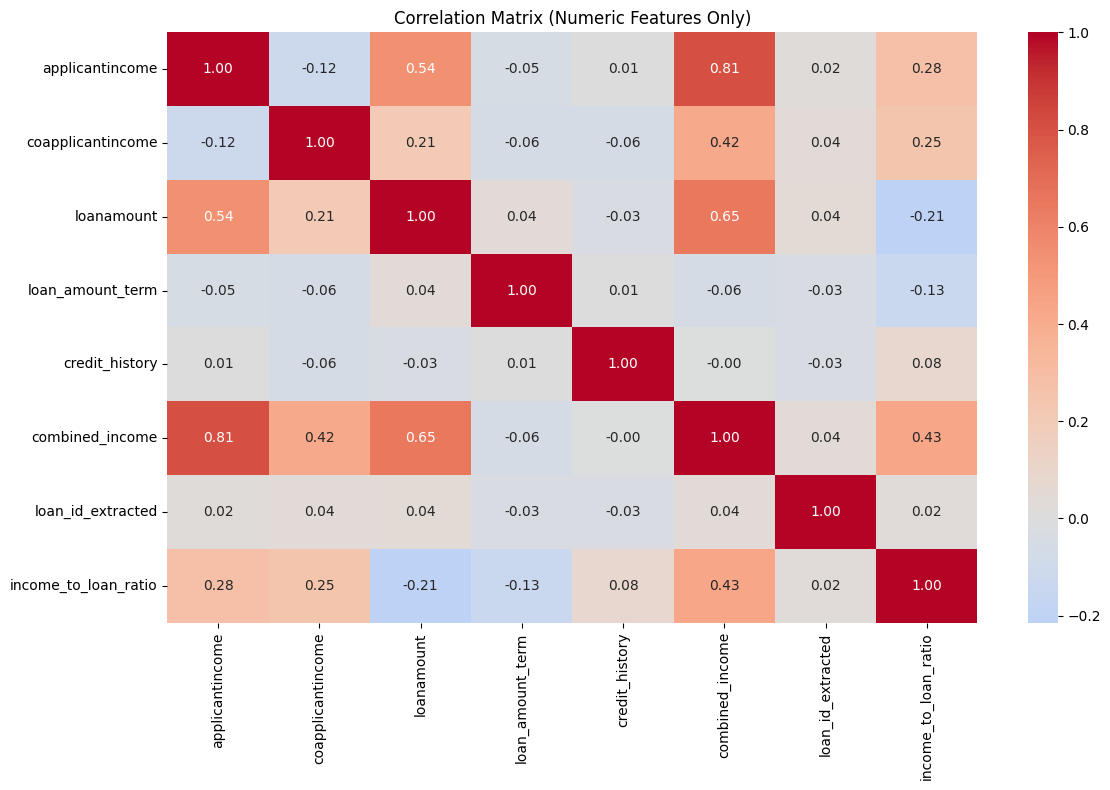

In [34]:
# Create correlation matrix only with numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.tight_layout()
plt.show()

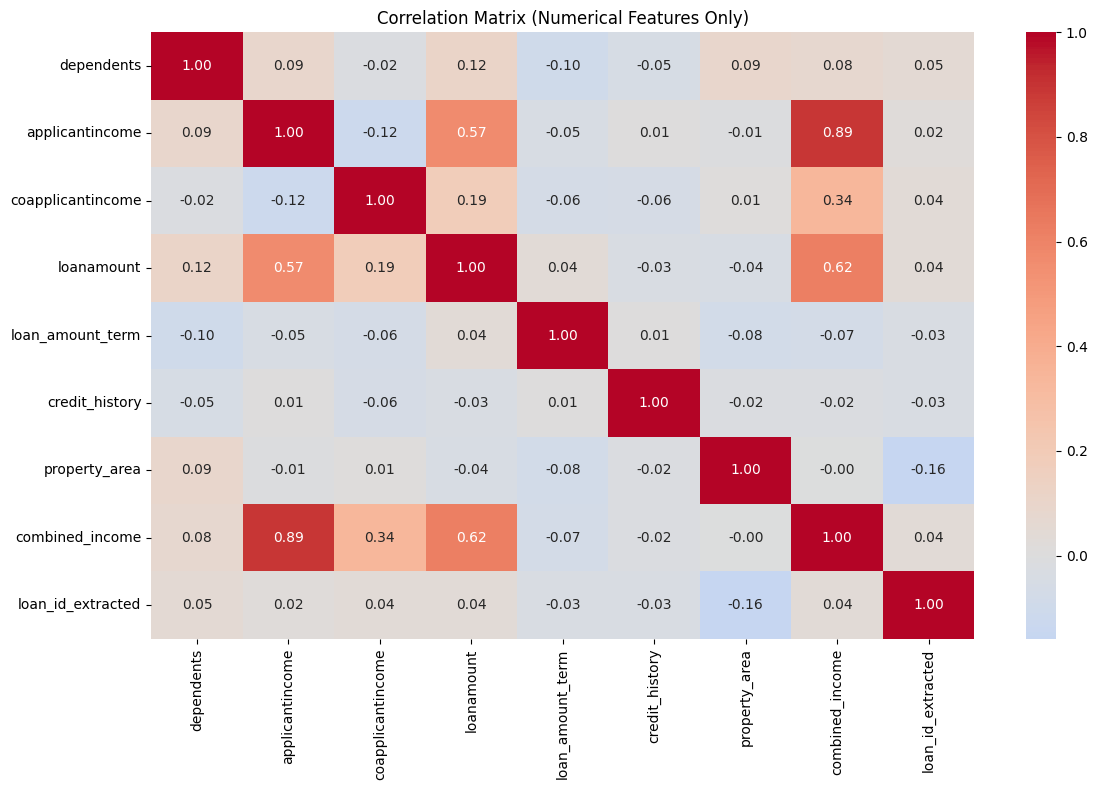

In [35]:
# Now create correlation matrix
plt.figure(figsize=(12,8))
# Select only numerical columns for correlation
numerical_df = df_corr.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.tight_layout()
plt.show()

# 07- Model Training

In [36]:
# convert target to binary
df['loan_status'] = df['loan_status'].map({'Y': 1, 'N': 0}).astype(int)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create key features
df['income_gt_4000'] = (df['combined_income'] > 4000).astype(int)

# Select key features + target
features = ['income_gt_4000', 'credit_history', 'property_area']
X = pd.get_dummies(df[features], columns=['property_area'], drop_first=True)
y = df['loan_status']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------")

# Show results
print("\nModel Comparison:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")

Logistic Regression Accuracy: 0.7480
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        41
           1       0.77      0.89      0.82        82

    accuracy                           0.75       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

----------------------------------
Random Forest Accuracy: 0.6992
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        41
           1       0.72      0.90      0.80        82

    accuracy                           0.70       123
   macro avg       0.66      0.60      0.60       123
weighted avg       0.68      0.70      0.66       123

----------------------------------
XGBoost Accuracy: 0.6992
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        41
           1       0.72      0.90      0.80        82

    accuracy       

# 08- Model Evaluation


=== Model Performance Comparison ===
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.747967   0.768421  0.890244  0.824859
3                  KNN  0.723577   0.744898  0.890244  0.811111
1        Random Forest  0.699187   0.718447  0.902439  0.800000
2              XGBoost  0.699187   0.718447  0.902439  0.800000
4                  SVM  0.699187   0.718447  0.902439  0.800000

=== Best Model ===
Model: Logistic Regression
Accuracy: 0.7480
F1-Score: 0.8249


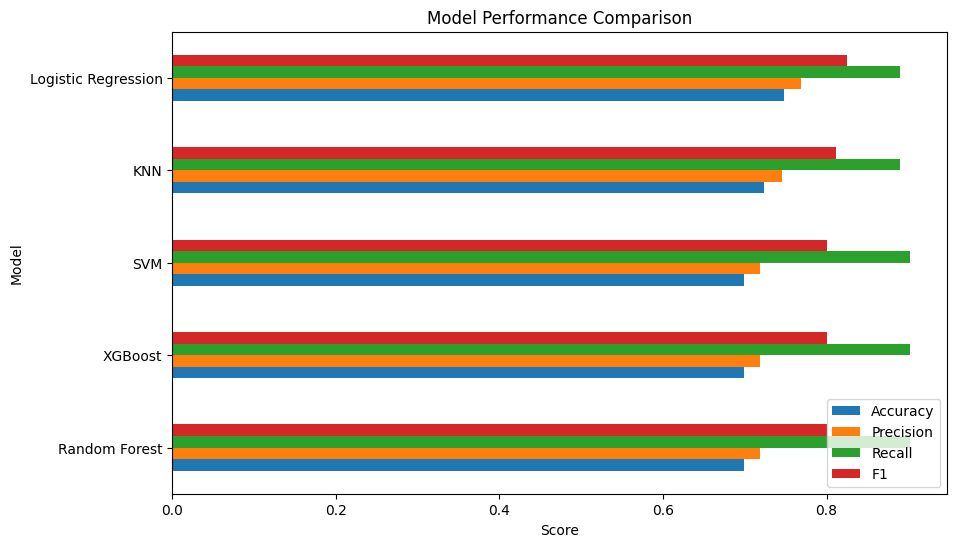

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Store results in a DataFrame
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

for name, model in models.items():
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.loc[len(results)] = [name, accuracy, precision, recall, f1]

# Display all results
print("\n=== Model Performance Comparison ===")
print(results.sort_values('Accuracy', ascending=False))

# Identify best model
best_model = results.loc[results['Accuracy'].idxmax()]
print("\n=== Best Model ===")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1-Score: {best_model['F1']:.4f}")

# Visual comparison
results.set_index('Model').sort_values('Accuracy').plot(kind='barh', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.show()

# 09- Hyperparameter Tuning

- Hyperparameter tuning is used to find the best model settings that improve accuracy and prevent overfitting.
- It optimizes model performance by testing different configurations.

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Define Search Spaces for Each Model

In [41]:
param_grids = {
    "Logistic Regression": {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    "KNN": {
        'n_neighbors': range(3, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    }
}

Tuning Implementation Using Randomized Search (Faster)

In [42]:
def tune_models_randomized(models, param_grids, X_train, y_train, n_iter=50, cv=5):
    best_models = {}

    for name, model in models.items():
        print(f"\n=== Tuning {name} ===")

        # Use randomized search
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=n_iter,
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )

        random_search.fit(X_train, y_train)
        best_models[name] = random_search.best_estimator_

        print(f"Best params: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_:.4f}")

    return best_models

best_models_random = tune_models_randomized(models, param_grids, X_train, y_train)


=== Tuning Logistic Regression ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


145 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

Best params: {'solver': 'sag', 'penalty': 'l2', 'C': np.float64(29.763514416313132)}
Best score: 0.7760

=== Tuning Random Forest ===
Best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best score: 0.7740

=== Tuning XGBoost ===
Best params: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best score: 0.7780

=== Tuning KNN ===
Best params: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'minkowski'}
Best score: 0.7780

=== Tuning SVM ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.



Best params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Best score: 0.7760


Tuning Implementation Using Grid Search (More Thorough but Slower)

In [43]:
def tune_models_grid(models, param_grids, X_train, y_train, cv=5):
    best_models = {}

    for name, model in models.items():
        print(f"\n=== Tuning {name} ===")

        # Use grid search
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=cv,
            scoring='accuracy',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_

        print(f"Best params: {grid_search.best_params_}")
        print(f"Best score: {grid_search.best_score_:.4f}")

    return best_models

# Use this only if your dataset is small or you have time
# best_models_grid = tune_models_grid(models, param_grids, X_train, y_train)

 Evaluation of Tuned Models

In [44]:
def evaluate_models(models, X_test, y_test):
    results = {}

    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"\n=== {name} ===")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(classification_report(y_test, y_pred))

    return results

# Evaluate the tuned models
tuned_results = evaluate_models(best_models_random, X_test, y_test)


=== Logistic Regression ===
Accuracy: 0.7480
Precision: 0.7684
Recall: 0.8902
F1 Score: 0.8249
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        41
           1       0.77      0.89      0.82        82

    accuracy                           0.75       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123


=== Random Forest ===
Accuracy: 0.6992
Precision: 0.7184
Recall: 0.9024
F1 Score: 0.8000
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        41
           1       0.72      0.90      0.80        82

    accuracy                           0.70       123
   macro avg       0.66      0.60      0.60       123
weighted avg       0.68      0.70      0.66       123


=== XGBoost ===
Accuracy: 0.7236
Precision: 0.7449
Recall: 0.8902
F1 Score: 0.8111
              precision    recall  f1-score   support

           0       0.

# 10- Saving Model

In [51]:
from joblib import dump

# Save all models with their exact names
for model_name, model in models.items():
    dump(model, f'{model_name.replace(" ", "_")}.joblib')

# 11- Conclusion & Business Insights
🔹 Loan Approval is Highly Influenced By:
- Credit History (Most critical factor)
- Applicant Income (Higher income → Higher approval chances)
- Loan Amount vs. Income Ratio (Lower ratio → Better approval odds)
- Co-applicant Income (Improves approval likelihood)

🔹 Best Model Choice:

- XGBoost (if highest accuracy is needed).

- Random Forest (if interpretability is important).

- Logistic Regression (if probability estimates are needed for risk scoring).





---

